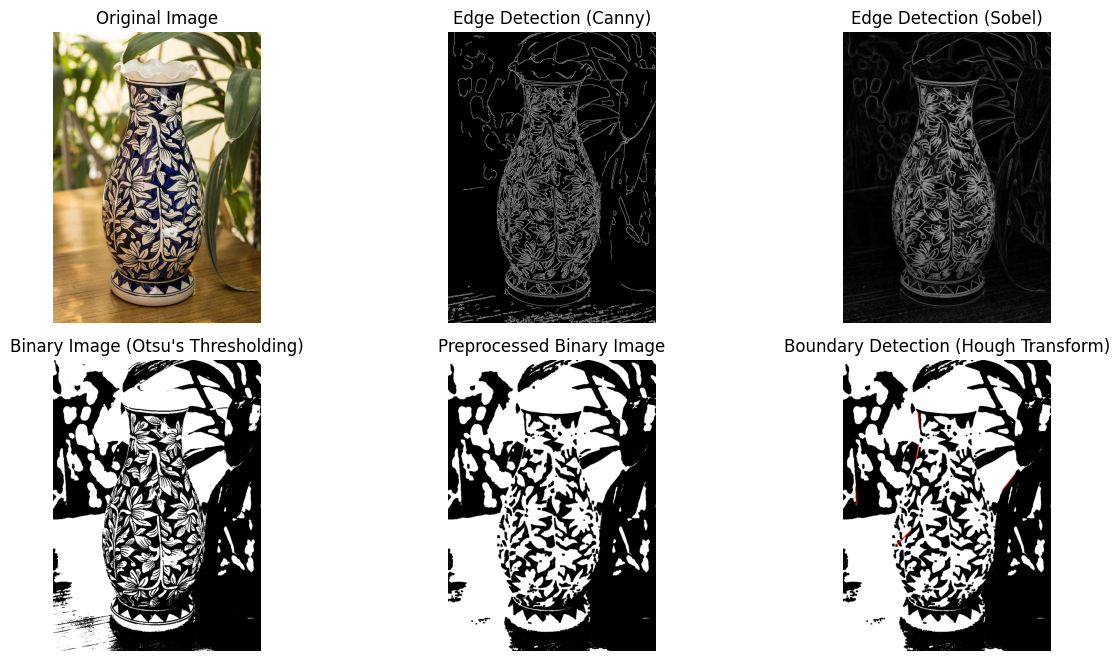

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

image_url = 'https://imgshopnewgumlet.lbb.in/catalog/product/x/-/x-02-bx-j-020-e-1.jpg?fm=webp&w=750&h=500&dpr=2'
response = requests.get(image_url)
image_data = BytesIO(response.content)

image_pil = Image.open(image_data)
image = np.array(image_pil)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges_canny = cv2.Canny(gray_image, 100, 200)

sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

_, binary_image_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(binary_image_otsu, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

edges_for_hough = cv2.Canny(eroded_image, 50, 150)
lines = cv2.HoughLinesP(edges_for_hough, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

boundary_image = cv2.cvtColor(eroded_image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(boundary_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(edges_canny, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Edge Detection (Sobel)")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(binary_image_otsu, cmap='gray')
plt.title("Binary Image (Otsu's Thresholding)")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(eroded_image, cmap='gray')
plt.title("Preprocessed Binary Image")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(boundary_image, cv2.COLOR_BGR2RGB))
plt.title("Boundary Detection (Hough Transform)")
plt.axis("off")

plt.tight_layout()
plt.show()